In [18]:
pip install boto3


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
import os
import boto3
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

In [47]:
key_id = os.getenv("AWS_ACCESS_KEY_ID")
secret_key = os.getenv("AWS_SECRET_ACCESS_KEY")
endpoint = os.getenv("AWS_S3_ENDPOINT")
bucket_name = os.getenv("AWS_S3_BUCKET")

In [24]:
s3_client = boto3.client(
    "s3",
    aws_access_key_id=key_id,
    aws_secret_access_key=secret_key,
    endpoint_url=endpoint,
    use_ssl=True
)

In [25]:
os.makedirs("data", exist_ok=True)

s3_client.download_file(bucket_name, '/data/historical.csv', 'data/historical.csv')
s3_client.download_file(bucket_name, '/data/sensors_data.csv', 'data/sensors_data.csv')
s3_client.download_file(bucket_name, '/data/measured_value.csv', 'data/measured_value.csv')

In [26]:
data = pd.read_csv('data/historical.csv')
data = data.rename(columns={'fecha': 'date'})
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data = data.asfreq('MS')
data = data.sort_index()

In [27]:
days = 7

In [28]:
sensors_data = pd.read_csv('data/sensors_data.csv')
sensors_data = sensors_data.loc[sensors_data.index[:days]]
sensors_data['date'] = pd.to_datetime(sensors_data['date'], format='%Y-%m-%d')
sensors_data = sensors_data.set_index('date')
sensors_data = sensors_data.asfreq('MS')

In [29]:
measured_value = pd.read_csv('data/measured_value.csv')
measured_value = measured_value.loc[measured_value.index[:days]]
measured_value['date'] = pd.to_datetime(measured_value['date'], format='%Y-%m-%d')
measured_value = measured_value.set_index('date')
measured_value = measured_value.asfreq('MS')

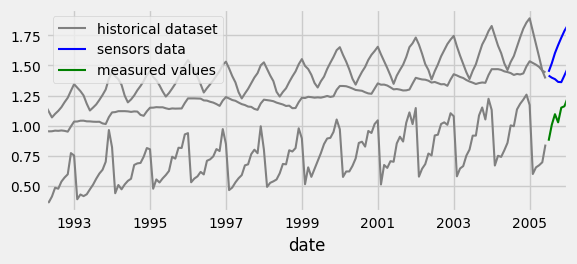

In [43]:
fig, ax = plt.subplots(figsize=(6, 2.5))
data['y'].plot(ax=ax, label='historical dataset', color='grey')
data['exog_1'].plot(ax=ax, label='_nolegend_', color='grey')
data['exog_2'].plot(ax=ax, label='_nolegend_', color='grey')
sensors_data['exog_1'].plot(ax=ax, label='sensors data', color = 'blue')
sensors_data['exog_2'].plot(ax=ax, label='_nolegend_', color = 'blue')
measured_value['y'].plot(ax=ax, label='measured values', color = 'green')
ax.legend(loc='upper left');

In [44]:
os.makedirs("training_data", exist_ok=True)

data.to_csv('training_data/historical.csv', sep=',', index=True, header=True)
sensors_data.to_csv('training_data/sensors_data.csv', sep=',', index=True, header=True)
measured_value.to_csv('training_data/measured_value.csv', sep=',', index=True, header=True)